In [1]:
#scraping various crypto time series from coinmarketcap.com plus and API that downloads data from Coinmarketcap and Bitfinex crypto exchange

#first import our modules     
from requests import Request, Session
import requests
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

from bs4 import BeautifulSoup as bs
from splinter import Browser
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

executable_path = {'executable_path': 'chromedriver.exe'}
browser = Browser('chrome', **executable_path, headless=False)


In [2]:
#COINMARKETCAP API, should take price info from here 
coin_marketcap_API='6ba141c1-d75c-496c-8362-96b1ce698ec3'
#url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' #price, volume, outstanding coins, max coin quotes
url= 'https://pro-api.coinmarketcap.com/v1/global-metrics/quotes/historical?interval=monthly&count=100'
'''
/v1/cryptocurrency/map Get CoinMarketCap ID map
/v1/cryptocurrency/info Get metadata
/v1/cryptocurrency/listings/latest List all cryptocurrencies (latest)
/v1/cryptocurrency/listings/historical List all cryptocurrencies (historical)
/v1/cryptocurrency/quotes/latest Get market quotes (latest)
/v1/cryptocurrency/quotes/historical Get market quotes (historical)
/v1/cryptocurrency/market-pairs/latest Get market pairs (latest)
/v1/cryptocurrency/ohlcv/latest Get OHLCV values (latest)
/v1/cryptocurrency/ohlcv/historical Get OHLCV values (historical)
'''

parameters = {
  'start':'1',
  'limit':'5000',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '6ba141c1-d75c-496c-8362-96b1ce698ec3',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(json.dumps(data, indent=2,sort_keys=True))
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(json.dumps(e, indent=2))
#examples
#for v in data.values():
#    print(v['x'], v['y'], v['yr'])

#for node in json_res['nodes']
#    print node['status']
    
new_data=data['data']

for j in new_data:
    print(j['name'])
    print(j['total_supply'])
    print(j['quote'])
    print("------------------------")

#new_new_data=new_data['quote']
#print(new_new_data)

{
  "status": {
    "credit_count": 0,
    "elapsed": 0,
    "error_code": 403,
    "error_message": "Your API Key subscription plan doesn't support this endpoint.",
    "timestamp": "2019-05-29T20:58:35.127Z"
  }
}


KeyError: 'data'

In [ ]:
#Bitfinex API, looking for leveraged longs & shorts  
#url = "https://api.bitfinex.com/v1/stats/btcusd"  #comes back with volume over 1, 7 and 30 day period
# https://api-pub.bitfinex.com/ #says this one is for public access 
#v2 stats shd contain longs & shorts 
#*********ENDED UP DOING THIS IN A GOOG SHEET SCRIPT*******************
'''  
STATS- this is the one for longs/shorts------------------------------------------------------------------
url= "https://api-pub.bitfinex.com/v2/stats1/" followed by Key:Size:Symbol/Section ie pos.size:1m:tBTCUSD:long/hist
 
V2 is the beta, there is also a V1
PathParameters (all strings):             
Key: Allowed values: "funding.size", "credits.size", "credits.size.sym", "pos.size"
Size: Available values: '1m'
Symbol: The symbol you want information about.
Side: Available values: "long", "short"
Section: Available values: "last", "hist"
QueryParameters:
sort int32 if = 1 it sorts results returned with old > new
Reponse Details:
MTS	int	millisecond timestamp
VALUE	float	Total amount
'''       

#get last leveraged shorts count in last_shorts
url= "https://api-pub.bitfinex.com/v2/stats1/pos.size:1m:tBTCUSD:short/last"          
response = requests.request("GET", url)
response=(response.text)

print(response)
response=response.split(",")
print(response[0])
time_stamp_longs=response[0].replace('[','')
last_shorts=response[1].replace(']','')
last_shorts=float(last_shorts)
print(last_shorts)    

#get last leveraged longs outstanding in last_longs
url= "https://api-pub.bitfinex.com/v2/stats1/pos.size:1m:tBTCUSD:long/last"          
response = requests.request("GET", url)
response=(response.text)

print(response)
response=response.split(",")
print(response[0])
time_stamp_longs=response[0].replace('[','')
last_longs=response[1].replace(']','')
last_longs=float(last_longs)
print(last_longs) 

print("long short ratio=", (last_longs/last_shorts))


In [3]:
#**********COINMARKETCAP SCRAPE************
#setting up the start end dates in right format using datetime 
#start_date=   #format is YYYYMMDD no other characters 
#end_date=  #format is YYYYMMDD no other characters 

import datetime
from datetime import timedelta 
#from datetime import datetime

#today = datetime.date.today()
today = datetime.datetime.now()
#was datetime.date.today()
day_ago=(today - timedelta(days=1))  
year_ago=(today - timedelta(days=365))  

start_date=year_ago.strftime("%Y%m%d")
end_date=day_ago.strftime("%Y%m%d")
Date = pd.date_range(start_date, end_date, freq='1D').strftime('%Y%m%d') #NOTE this is without hyphens!!!
print(start_date)
print(end_date)
agg_vol_url='https://coinmarketcap.com/currencies/bitcoin/historical-data/?start='+start_date+'&end='+end_date
print(agg_vol_url)
response = requests.get(agg_vol_url).text
soup=bs(response,'html') #beautifulsoup
my_table = soup.find('table',class_='table')
print(my_table)

20180529
20190528
https://coinmarketcap.com/currencies/bitcoin/historical-data/?start=20180529&end=20190528
<table class="table">
<thead>
<tr>
<th class="text-left">Date</th>
<th class="text-right">Open*</th>
<th class="text-right">High</th>
<th class="text-right">Low</th>
<th class="text-right">Close**</th>
<th class="text-right">Volume</th>
<th class="text-right">Market Cap</th>
</tr>
</thead>
<tbody>
<tr class="text-right">
<td class="text-left">May 28, 2019</td>
<td data-format-fiat="" data-format-value="8802.75819975">8802.76</td>
<td data-format-fiat="" data-format-value="8807.01613958">8807.02</td>
<td data-format-fiat="" data-format-value="8634.72130428">8634.72</td>
<td data-format-fiat="" data-format-value="8719.9617362">8719.96</td>
<td data-format-market-cap="" data-format-value="24226919266.7">24,226,919,267</td>
<td data-format-market-cap="" data-format-value="1.54590202287e+11">154,590,202,287</td>
</tr>
<tr class="text-right">
<td class="text-left">May 27, 2019</td>
<td

In [4]:
#get a dataframe ready to hold the data and then pull it out 
vol_df = pd.DataFrame() 
row=[]
for link in my_table.find_all('tr'):
    name = link.find('td') #pulling out the first line with date 
    #print(link.text)
    item=link.text
    row=pd.Series(item.split('\n')) #the tables delimiter is new line \n 
    #print(row)
    vol_df=vol_df.append(row, ignore_index=True) #append to the panda 


#massage the panda     
vol_df=vol_df.iloc[1:,1:8]
vol_df.columns = ['Date','Open','High','Low','Close','Volume','MarketCap']

vol_df['Volume']=vol_df['Volume'].str.replace(',','') # get rid of commas to change to number
vol_df['MarketCap']=vol_df['MarketCap'].str.replace(',','') # get rid of commas to change to number

vol_df['Close'] = vol_df['Close'].astype(float)

vol_df['Volume'] = vol_df['Volume'].astype(np.int64) #convert from string to int for calcss 
vol_df['MarketCap'] = vol_df['MarketCap'].astype(np.int64) #convert from string to float for calcss 

vol_df['UnitVolume'] = vol_df['Volume']/vol_df['Close']/1000
#vol_df['Rolling20D'] = vol_df.rolling(20,on='UnitVolume').mean #this is the code from python.org that DOESN'T WORK

vol_df = vol_df.reindex(index=vol_df.index[::-1])  #reverse the order of the panda so it starts with oldest on x axis 
vol_df['Rolling20D'] = vol_df['UnitVolume'].rolling(20).mean()

pd.options.display.max_rows = 20 #I had this 999 to see whole PD 
#****need to add date to the df here
vol_df['Date'] = Date
vol_df


,Date,Open,High,Low,Close,Volume,MarketCap,UnitVolume,Rolling20D
365,20180529,7129.46,7526.42,7090.68,7472.59,5662660096,127502651064,757.790819,NaN
364,20180530,7469.73,7573.77,7313.60,7406.52,4922540032,126391893474,664.622526,NaN
363,20180531,7406.15,7608.90,7361.13,7494.17,5127130112,127902999390,684.149160,NaN
362,20180601,7500.70,7604.73,7407.34,7541.45,4921460224,128725854692,652.588060,NaN
361,20180602,7536.72,7695.83,7497.26,7643.45,4939299840,130481526036,646.213404,NaN
360,20180603,7632.09,7754.89,7613.04,7720.25,4851760128,131808021256,628.445987,NaN
359,20180604,7722.53,7753.82,7474.04,7514.47,4993169920,128312205314,664.473998,NaN
358,20180605,7500.90,7643.23,7397.00,7633.76,4961739776,130365918088,649.973247,NaN
357,20180606,7625.97,7680.43,7502.01,7653.98,4692259840,130725095161,613.048354,NaN
356,20180607,7650.82,7741.27,7650.82,7678.24,4485799936,131153169176,584.222418,NaN


In [7]:
vol_df.to_csv('3Y_BTC_5-15-19.csv')

,Date,Open,High,Low,Close,Volume,MarketCap,UnitVolume,Rolling20D
1095,20160516,457.59,458.20,452.95,454.16,59171500,7063120268,130.287784,NaN
1094,20160517,454.01,455.07,453.61,453.78,64100300,7058821457,141.258539,NaN
1093,20160518,453.69,456.00,453.30,454.62,86850096,7073564772,191.038881,NaN
1092,20160519,454.52,454.63,438.71,438.71,96027400,6827425412,218.885824,NaN
1091,20160520,437.79,444.05,437.39,442.68,81987904,6890716750,185.208060,NaN
1090,20160521,442.97,443.78,441.71,443.19,42762300,6900237725,96.487511,NaN
1089,20160522,443.22,443.43,439.04,439.32,39657600,6842082300,90.270418,NaN
1088,20160523,439.35,444.35,438.82,444.15,50582500,6919346395,113.886075,NaN
1087,20160524,444.29,447.10,443.93,445.98,65783100,6949432035,147.502354,NaN
1086,20160525,446.06,450.30,446.06,449.60,65231000,7007360094,145.086744,NaN


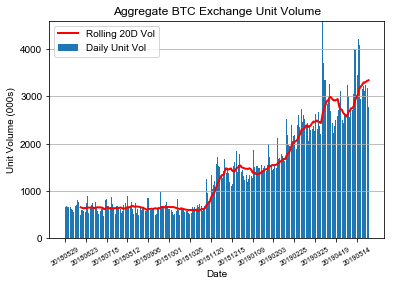

In [5]:
#lets set up params for our aggregate volume graph 
plt.rcParams["font.family"] = "arial" #SET universal font for charts

#first the bar plot 
plt.bar(x=vol_df['Date'], height=vol_df['UnitVolume'],label='Daily Unit Vol')
plt.xlabel('Date', fontsize=10)
plt.ylabel('Unit Volume (000s)', fontsize=10)

#plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('Aggregate BTC Exchange Unit Volume', fontsize=12)
plt.xticks([0,25,50,75,100,125,150,175,200,225,250,275,300,325,350], fontsize=7, rotation=30) #FOR 1 YR chart
#plt.xticks([0,50,100,150,200,250,300,350, 400,450,500,550,600,650,700,750,800,850,900,950,1000,1050], fontsize=7, rotation=30) #FOR 1 YR chart

# plt.figure(figsize=(50,100)) *****************THIS IS WHAT CAUSED the inability to save chart issues **************************
# plt.show()
plt.ylim(0,4600)

#then the line plot 
plt.plot(vol_df['Date'], vol_df['Rolling20D'], marker="", color="red", linewidth=2, label='Rolling 20D Vol')
plt.grid(b=True, axis='y') #y axis gridlines
plt.legend()
#save it 
plt.savefig("Agg_Exchange_Volume_365.jpg",dpi=150, transparent=True, quality=90) #save the graph in local dir
#plt.savefig("Agg_Exchange_Volume.jpg",dpi=30, transparent=True, quality = 70)
#plt.show()

In [70]:
#-------------------next 2 windoes to scrape total cap from coinmarketcap.com ----------------------------------
#---------------------------------------------------------------------------------------------------------------
import pandas as pd
import requests
import re
from bs4 import BeautifulSoup
import time, random

market_cap = []
new_date = []

In [85]:
# Create date range for historical snapshots
Date = pd.date_range(start='20180101', end='20190514', freq='1D').strftime('%Y%m%d') #NOTE this is without hyphens!!!
print(Date)
# Retrieve market cap value in dollars
j=0

for date in Date:
# lets scrape that market cap line for the passed date  
   page = requests.get('https://coinmarketcap.com/historical/'+date)
   soup = BeautifulSoup(page.content, 'html.parser')
   #print(soup)
   tot_cap = soup.find('span',class_='market-cap')
   x=str(tot_cap)
   x=x.split('$')
   #print(x[1])
   x=x[1].split(' ')
   x=x[0].replace(',','')
   print(x)
   market_cap.append(x)
   new_date.append(date)
   k=random.randint(0,2000)
   time.sleep((k/1000)) 
   if(j==y):  #times out after 5 scrapes so lets put a timer in to pause it here 
       x=random.randint(0,1000)
       y=random.randint(1,4)
       time.sleep((y+50+x/1000))
       j=0
   j+=1 

# Create data frame of data
df = pd.DataFrame({'Total Market Cap':market_cap})
                  #, index=Date)
df['Date']=Date #add the date column
    
# Write data to file
df.to_csv('crypto_total_cap.csv')


Index(['20180630', '20180701', '20180702', '20180703', '20180704', '20180705',
       '20180706', '20180707', '20180708', '20180709',
       ...
       '20190505', '20190506', '20190507', '20190508', '20190509', '20190510',
       '20190511', '20190512', '20190513', '20190514'],
      dtype='object', length=319)
257587778438
257373095796
270462135563
266147996234
270448315491
272086453075
269898132713
278339309553
274738195261
269284347857
250584641073
254174084151
246075329207
248602838522
249689215909
255246303913
273344748493
292043786598
289556082121
288289366704
276466491812
281761734448
280637949760
283473675523
304243111849
299028290195
291143764539
297076401720
297196797873
297770629572
292879783360
277886894042
272961977707
267016956589
266541262777
253689577995
256527775429
251819065097
240962935314
221236941014
230620532191
215093301061
213051917245
213277525694
204148344043
199085763449
202627314685
205149768467
223508082357
212697924435
216926786706
205640565211
2117764259

In [109]:

Date = pd.date_range(start='20180101', end='20190514', freq='1D').strftime('%Y%m%d')
df['Date']=Date
df.to_csv('crypto_total_cap.csv')


499


,Total Market Cap,Date
0,616875617584,2018-01-01
1,675149195563,2018-01-02
2,737171792198,2018-01-03
3,753504665717,2018-01-04
4,782299124171,2018-01-05
5,816293196065,2018-01-06
6,830595477030,2018-01-07
7,743842264530,2018-01-08
8,732667195958,2018-01-09
9,735130683215,2018-01-10
